# Problem description

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.


## Goal

## Learning objectives

- Demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.
- We will make suggestions for ways to approach the problem
    - But there will be little explicit direction for this task.
- It is meant to be analogous to a pre-interview task that a potential employer might assign
to verify your skill

# Import modules

In [1]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


# API for students

In [2]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# **Step 1:** Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [3]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float64`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So you might want to first convert all attributes to numeric

**Hint**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

# **Step 2:** Prepare the Data:

## Handle non-numeric attributes:

In [6]:
## Transferring all object columns into numeric values (in data)
for col in data.columns: 
    data[col]=pd.to_numeric(data[col], errors='coerce')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4816 non-null   float64
 1   X2        4816 non-null   float64
 2   X3        4816 non-null   float64
 3   X4        4803 non-null   float64
 4   X5        4808 non-null   float64
 5   X6        4816 non-null   float64
 6   X7        4816 non-null   float64
 7   X8        4804 non-null   float64
 8   X9        4818 non-null   float64
 9   X10       4816 non-null   float64
 10  X11       4816 non-null   float64
 11  X12       4803 non-null   float64
 12  X13       4818 non-null   float64
 13  X14       4816 non-null   float64
 14  X15       4812 non-null   float64
 15  X16       4804 non-null   float64
 16  X17       4804 non-null   float64
 17  X18       4816 non-null   float64
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4744 non-null   floa

In [8]:
## After transferring all data into numeric values, I found some values in dataframe "data" is NAN missing values,
## The following results shows how many missing values in each columns
for x in data.columns:
    print (x+":",sum(data[x].isnull()))

X1: 2
X2: 2
X3: 2
X4: 15
X5: 10
X6: 2
X7: 2
X8: 14
X9: 0
X10: 2
X11: 2
X12: 15
X13: 0
X14: 2
X15: 6
X16: 14
X17: 14
X18: 2
X19: 0
X20: 0
X21: 74
X22: 2
X23: 0
X24: 116
X25: 2
X26: 14
X27: 305
X28: 83
X29: 2
X30: 0
X31: 0
X32: 42
X33: 15
X34: 14
X35: 2
X36: 2
X37: 2068
X38: 2
X39: 0
X40: 15
X41: 62
X42: 0
X43: 0
X44: 0
X45: 220
X46: 15
X47: 31
X48: 2
X49: 0
X50: 14
X51: 2
X52: 32
X53: 83
X54: 83
X55: 0
X56: 0
X57: 2
X58: 0
X59: 2
X60: 220
X61: 12
X62: 0
X63: 15
X64: 83
Bankrupt: 0
Id: 0


In [9]:
## Double check positions of missing values to ensure above code is correct.
np.where(data["X1"].isnull()==True)

(array([1813, 3337], dtype=int64),)

## Data Cleaning:
### Processing Missing Values:

In [374]:
## conda install -c conda-forge missingno

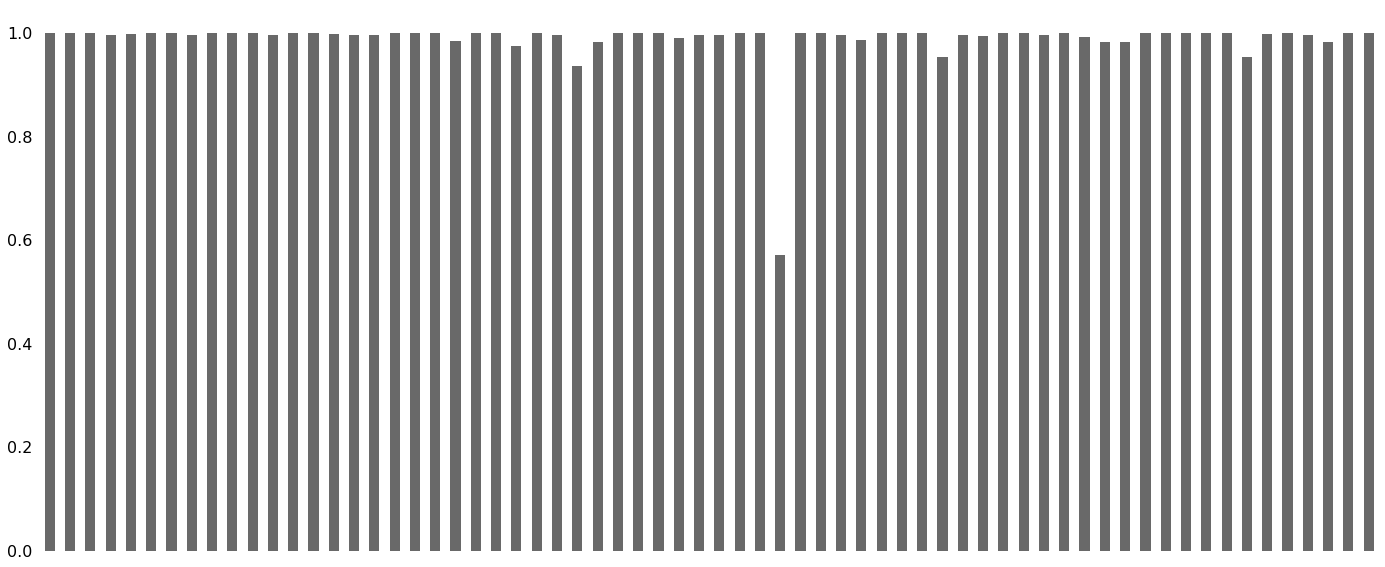

In [10]:
import missingno as msno
msno.bar(data)

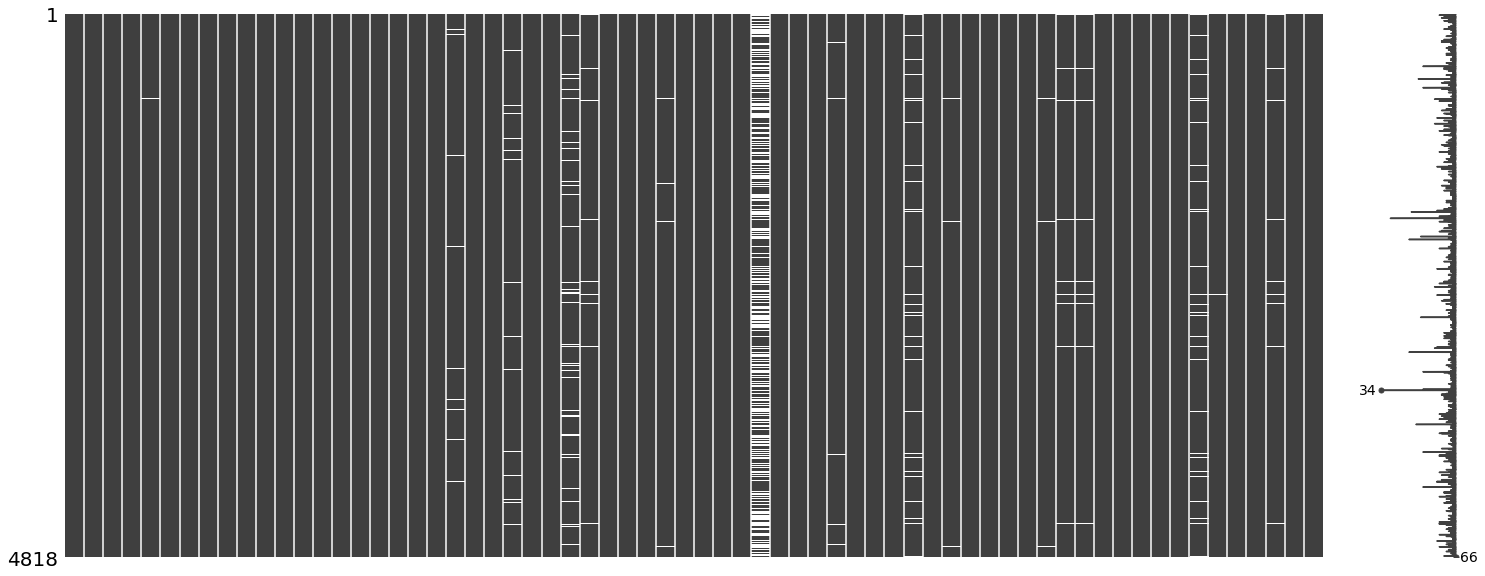

In [11]:
msno.matrix(data)

**Comments:** Based on the above graph, the x37 feature has about 43% missing data, thus this feature is considered not being used for modelling (because less than 80% non-missing values remaining)
#### Findings:
- No missing values in "X64"-bankrupt and "X65"-id, so no need to delete non-target value examples.

- Are the missing values in a pattern or at random?
- Does value missingness depend on other variables?
- Here I need to check the missingness type and determine how to deal with missing data.

**Check the correlation of missing data here:** the dependency of missing values on other variable present or absent

#### Missingness Heatmap:

This heatmap shows the correlation of missingness between columns. The columns where the missing values co-occur the maximum are highly rated.

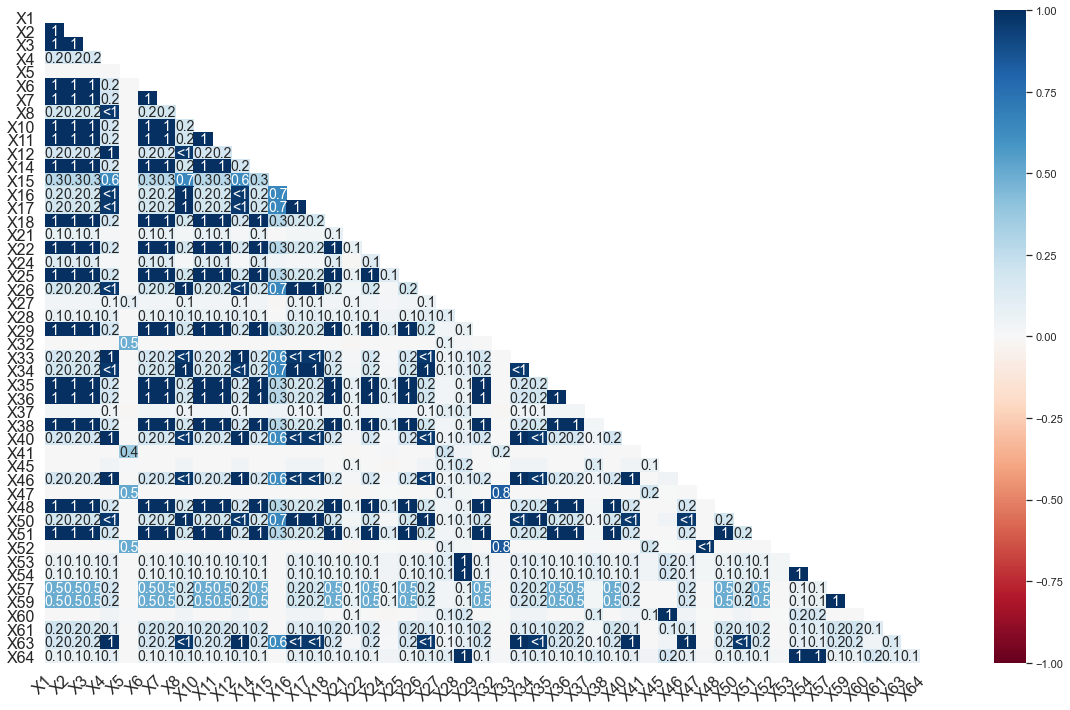

In [12]:
import seaborn as sns
sns.set()
msno.heatmap(data)
plt.show()

**Comments:** The bluer the cell is, the higher correlation of missing values shown.

In [13]:
data.dropna().shape

(2474, 66)

**Comments:** if choosing to delete all nan missing values from the original dataset, there will be only 2474 entries remaining. 
Simply saying only 51.3% complete data would remain for training if deleting all nan values.
- Since deleting all nan values would miss nearly 50% data for training, I would not choose to delete all nan values, but trying to find other ways to deal with this problem.

### Determine how many entries of data would be kept for training:

In [14]:
data_without_x37=pd.DataFrame(data.drop(columns=["X37"]))

In [15]:
data_without_x37

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.417690,0.05680,1.16050,-126.3900,0.413550,0.025417,1.23950,1.16500,0.51773,...,0.049094,0.85835,0.123220,5.6167,7.4042,164.3100,2.2214,1.3340,0,4510
1,-0.023834,0.210100,0.50839,4.23740,22.0340,0.058412,-0.027621,3.65790,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.4460,13.8020,6.4782,0,3537
2,0.030515,0.446060,0.19569,1.56500,35.7660,0.281960,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.252660,15.0490,2.8179,104.7300,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68000,438.2000,0.136490,0.058164,10.85300,1.02790,0.61173,...,0.085524,0.97282,0.000000,6.0157,7.4626,48.7560,7.4863,1.0602,0,1806
4,0.000992,0.497120,0.12316,1.30360,-71.3980,0.000000,0.001007,1.01160,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.5820,114.5800,3.1854,2.7420,0,1529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,0.211990,0.205850,0.14170,1.79410,72.9810,0.000000,0.265310,3.85790,0.98420,0.79415,...,0.266940,0.73275,0.022101,NaN,3.5081,66.1710,5.5160,1.4476,0,1985
4814,0.311900,0.099580,0.57936,10.67900,245.9800,0.000000,0.313170,9.04220,1.05160,0.90042,...,0.346400,0.70705,0.044114,14.0180,7.0618,20.7760,17.5680,2.9149,0,3963
4815,-0.029746,0.448980,0.39136,1.93880,7.8073,-0.020006,-0.030561,1.22590,1.00010,0.55040,...,-0.054046,0.99986,0.058336,15.5470,8.7022,34.3700,10.6200,23.0860,0,4167
4816,0.284730,0.079573,0.46261,6.81370,-81.1580,-0.795510,0.284730,11.56700,6.07180,0.92043,...,0.309350,0.19889,0.000000,NaN,28.5000,4.7834,76.3050,13.2630,0,1579


In [16]:
## After dropping X37 feature, if I choose to delete all examples with missing data, then 4087 examples would remain.
pd.DataFrame(data_without_x37.dropna()).shape

(4087, 65)

In [17]:
#threshod for rows:
for i in range(60,66):
    print (i,":",data_without_x37.dropna(thresh=i,axis=0).shape[0])

60 : 4761
61 : 4744
62 : 4702
63 : 4647
64 : 4471
65 : 4087


In [18]:
## Here choose to set threshod as 63, that means for each row, if there are less or equal to 2 missing values can be kept (based on data_without_x37)
data_new=data_without_x37.dropna(thresh=63,axis=0)

In [19]:
for y in data_new.columns:
    print (y+":",sum(data_new[y].isnull()))

X1: 0
X2: 0
X3: 0
X4: 0
X5: 1
X6: 0
X7: 0
X8: 0
X9: 0
X10: 0
X11: 0
X12: 0
X13: 0
X14: 0
X15: 0
X16: 0
X17: 0
X18: 0
X19: 0
X20: 0
X21: 57
X22: 0
X23: 0
X24: 104
X25: 0
X26: 0
X27: 236
X28: 0
X29: 0
X30: 0
X31: 0
X32: 12
X33: 0
X34: 0
X35: 0
X36: 0
X38: 0
X39: 0
X40: 0
X41: 39
X42: 0
X43: 0
X44: 0
X45: 141
X46: 0
X47: 1
X48: 0
X49: 0
X50: 0
X51: 0
X52: 2
X53: 0
X54: 0
X55: 0
X56: 0
X57: 0
X58: 0
X59: 0
X60: 141
X61: 2
X62: 0
X63: 0
X64: 0
Bankrupt: 0
Id: 0


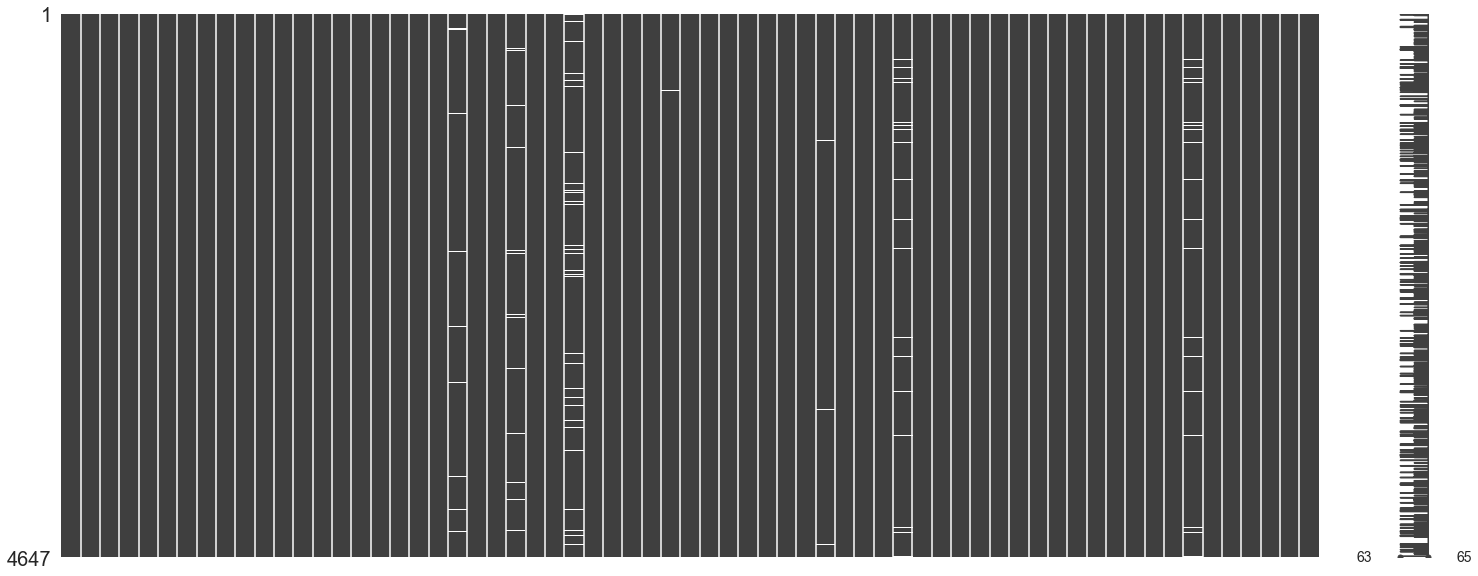

In [20]:
msno.matrix(data_new)
plt.show()

**Comments: Conclusion of Missing Data Cleaning** 
- The"X37" feature has around 40% missing data, which would cause nearly 1927 entries not being used if taking it into later model.Thus, X37 feature is abandoned for using.
- The "threshold" cheaking loop above indicates that choosing threshold=63 is reasonable, which means for each row, if there are less or equal to 2 missing values can be kept.
 - This is because from threshold 63 to 64, there will be more than 170 entries dropped for training (compared to 63-62 with around 50 missing, 64-63 missing amount is large). To maximize traing set volume and lower inacuracy brought by missing data, threshold=63 should be chosen. 
 - However, to keep training data absolutely unbiased, I finally choose to delete all examples with missing values.(This is a trade-off choice made between traing set volume and unbiased training). And I have tried the 63 threshold version, it does not work better than deleting-all missing version here.

Until now, the missing data heatmap looks much better than the one before, controlling maximum two missing values for each row for later feature engineering.
 In this step, not all missing data is removed from dataset.

## Feature Engineering:

Dropping all NAN missing values from dataset without X37. In this case,no imputation techniques are used and no biased "make-up" data effects on training.

In [21]:
data_no_missing=data_without_x37.dropna()

In [22]:
data_no_missing.shape

(4087, 65)

In [23]:
## Double check to ensure no missing values in dataframe now:
for z in data_no_missing.columns:
    print (z+":",sum(data_no_missing[z].isnull()))

X1: 0
X2: 0
X3: 0
X4: 0
X5: 0
X6: 0
X7: 0
X8: 0
X9: 0
X10: 0
X11: 0
X12: 0
X13: 0
X14: 0
X15: 0
X16: 0
X17: 0
X18: 0
X19: 0
X20: 0
X21: 0
X22: 0
X23: 0
X24: 0
X25: 0
X26: 0
X27: 0
X28: 0
X29: 0
X30: 0
X31: 0
X32: 0
X33: 0
X34: 0
X35: 0
X36: 0
X38: 0
X39: 0
X40: 0
X41: 0
X42: 0
X43: 0
X44: 0
X45: 0
X46: 0
X47: 0
X48: 0
X49: 0
X50: 0
X51: 0
X52: 0
X53: 0
X54: 0
X55: 0
X56: 0
X57: 0
X58: 0
X59: 0
X60: 0
X61: 0
X62: 0
X63: 0
X64: 0
Bankrupt: 0
Id: 0


In [24]:
## 4087 rows of data remaining for training and testing:
## Check dummy variables:
for i in data_no_missing.columns:
    print (i,":",len(pd.unique(data_no_missing[i])))

X1 : 3926
X2 : 3933
X3 : 3947
X4 : 3852
X5 : 4012
X6 : 2526
X7 : 3941
X8 : 3936
X9 : 3411
X10 : 3926
X11 : 3941
X12 : 3969
X13 : 3938
X14 : 3941
X15 : 3969
X16 : 3976
X17 : 3854
X18 : 3941
X19 : 3959
X20 : 3933
X21 : 3261
X22 : 3698
X23 : 3951
X24 : 3947
X25 : 3948
X26 : 3955
X27 : 3745
X28 : 3979
X29 : 3713
X30 : 3910
X31 : 3970
X32 : 3896
X33 : 3936
X34 : 3990
X35 : 3950
X36 : 3810
X38 : 3900
X39 : 3947
X40 : 3971
X41 : 3955
X42 : 3703
X43 : 3775
X44 : 3916
X45 : 3963
X46 : 3905
X47 : 3952
X48 : 3960
X49 : 3947
X50 : 3878
X51 : 3905
X52 : 3887
X53 : 3905
X54 : 3822
X55 : 3985
X56 : 3963
X57 : 3891
X58 : 3631
X59 : 2405
X60 : 3912
X61 : 3920
X62 : 3900
X63 : 3917
X64 : 3927
Bankrupt : 2
Id : 4087


No feature is binary in this dataset,except the target value "Bankrupt".

In [25]:
## Check how many data is positive or negative in 'bankrupt' column:
data_no_missing['Bankrupt'].value_counts() 

0    3942
1     145
Name: Bankrupt, dtype: int64

**Comment:This is an imbalanced dataset**, with non-bankrupt value numbers 27 times of bankrupt value numbers.

### Stratified Sampling and Train/Test Set speration:

In [26]:
X=data_no_missing.drop(['Bankrupt','Id'],axis=1)
y=data_no_missing.Bankrupt

In [27]:
X.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X38', 'X39', 'X40', 'X41', 'X42',
       'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52',
       'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62',
       'X63', 'X64'],
      dtype='object')

In [28]:
## double check dataset volume now after deleting examples with missing values:
len(y)

4087

In [29]:
y.value_counts()

0    3942
1     145
Name: Bankrupt, dtype: int64

In [30]:
## Leaving 15% data into test set using stratified sampling, since original dataset is imbalanced.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y,random_state=42)

In [31]:
## Check the stratified train/test seperation:
y_train.value_counts()

0    3350
1     123
Name: Bankrupt, dtype: int64

In [32]:
y_test.value_counts()

0    592
1     22
Name: Bankrupt, dtype: int64

### Preprocessing Data (normal distributed & similar variance to avoid training bias):
1. standardization: 
    - **Linear Space:** For Linear Regression and K-nearest Model, data input is reauired to be standardized. The model assumes that data and features are given in are related in a linear fashion or can be measured with a linear distance metric.
    - **Some data features have high variance:** If variance of some features have variance magnitude greater than the other features, this could impact the model's ability to learn from other features in this dataset.
    - **Dataset features are continuous and on different scales:** in this case, some particular features should be standardized.

In the following methods, data preprocessing and model fitting are conducted together.

In [33]:
data_no_missing.var()

X1          2.410540e-02
X2          1.424600e-01
X3          1.200674e-01
X4          5.041483e+01
X5          1.801757e+06
                ...     
X62         9.437513e+04
X63         5.176456e+01
X64         1.894324e+05
Bankrupt    3.422801e-02
Id          1.950214e+06
Length: 65, dtype: float64

Text(0.5, 0, 'X1')

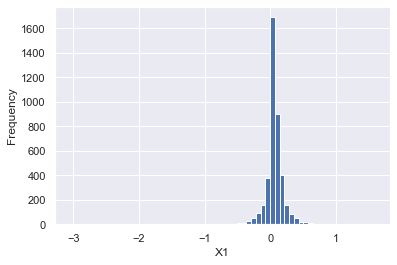

Text(0.5, 0, 'X2')

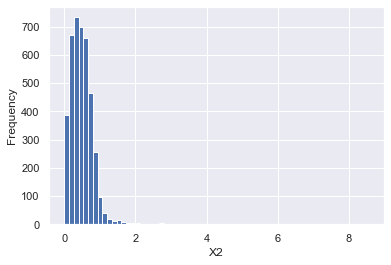

Text(0.5, 0, 'X3')

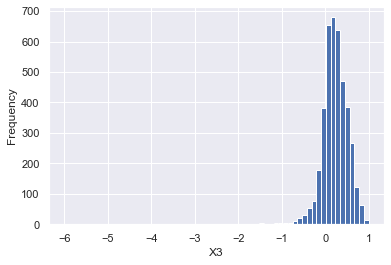

Text(0.5, 0, 'X4')

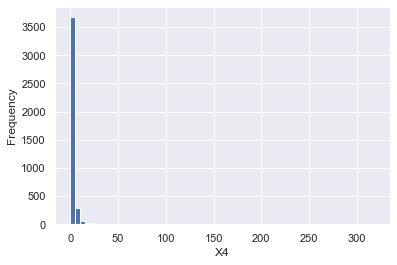

Text(0.5, 0, 'X5')

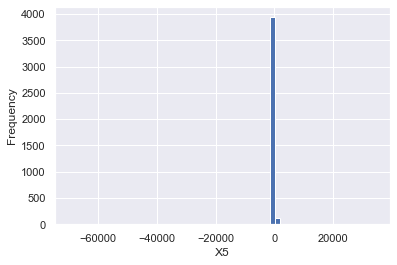

Text(0.5, 0, 'X6')

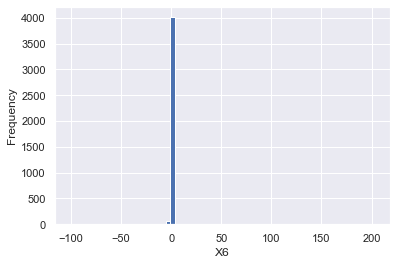

Text(0.5, 0, 'X7')

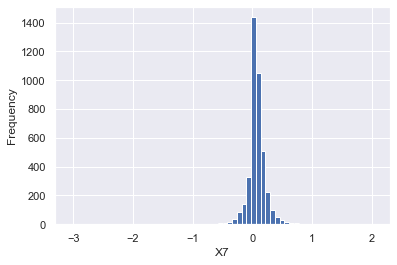

Text(0.5, 0, 'X8')

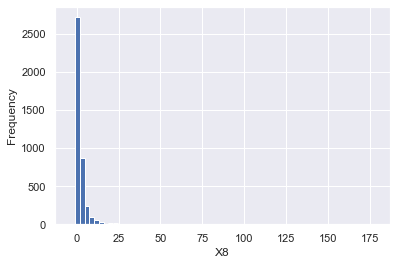

Text(0.5, 0, 'X9')

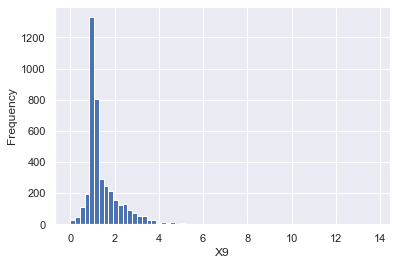

Text(0.5, 0, 'X10')

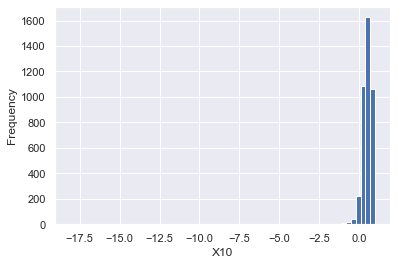

Text(0.5, 0, 'X11')

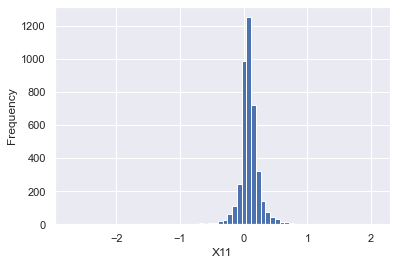

Text(0.5, 0, 'X12')

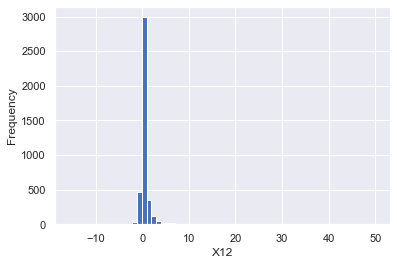

Text(0.5, 0, 'X13')

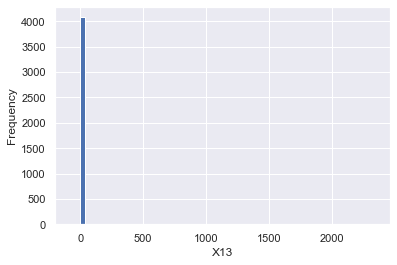

Text(0.5, 0, 'X14')

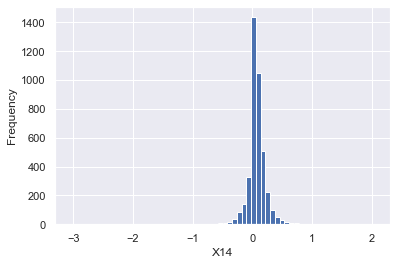

Text(0.5, 0, 'X15')

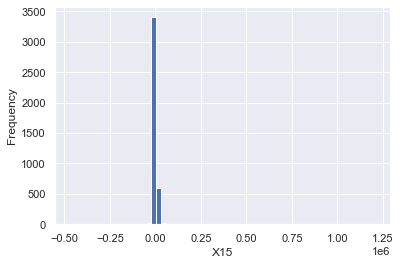

Text(0.5, 0, 'X16')

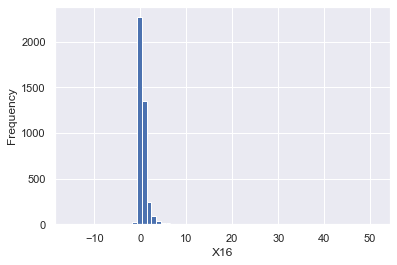

Text(0.5, 0, 'X17')

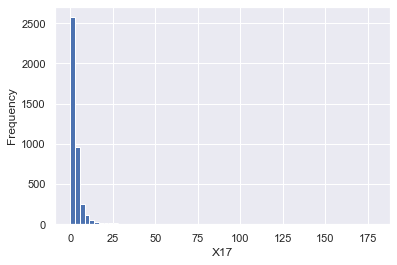

Text(0.5, 0, 'X18')

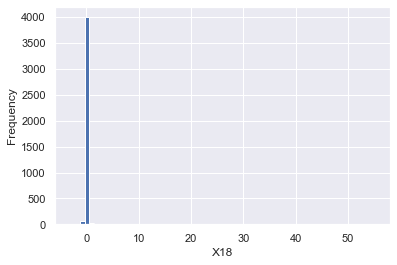

Text(0.5, 0, 'X19')

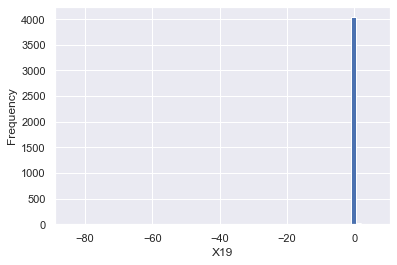

Text(0.5, 0, 'X20')

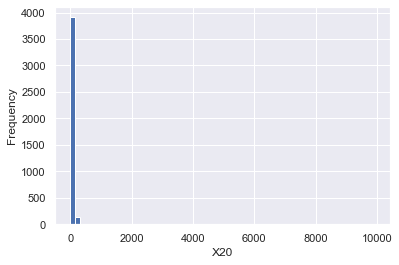

Text(0.5, 0, 'X21')

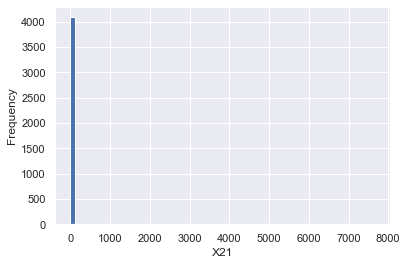

Text(0.5, 0, 'X22')

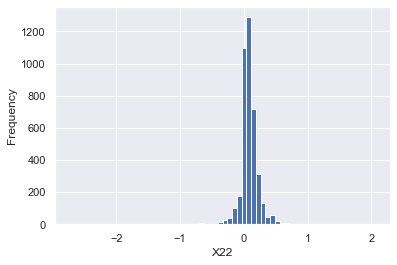

Text(0.5, 0, 'X23')

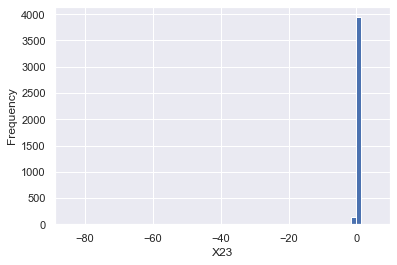

Text(0.5, 0, 'X24')

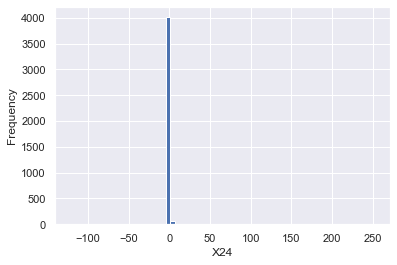

Text(0.5, 0, 'X25')

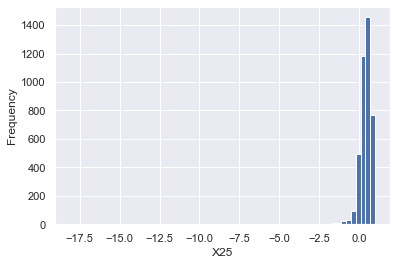

Text(0.5, 0, 'X26')

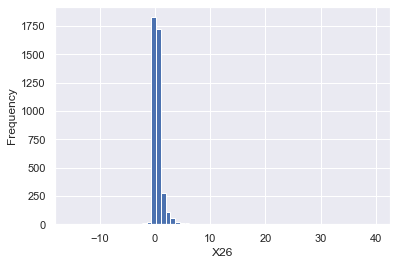

Text(0.5, 0, 'X27')

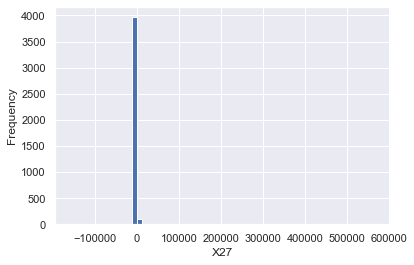

Text(0.5, 0, 'X28')

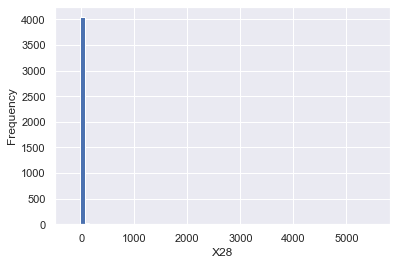

Text(0.5, 0, 'X29')

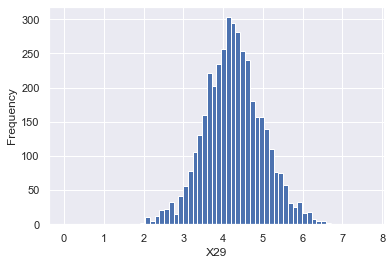

Text(0.5, 0, 'X30')

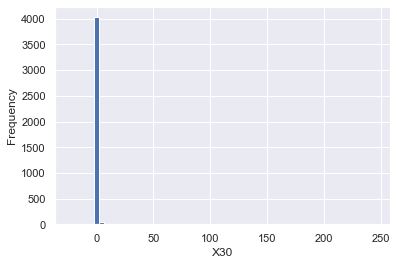

Text(0.5, 0, 'X31')

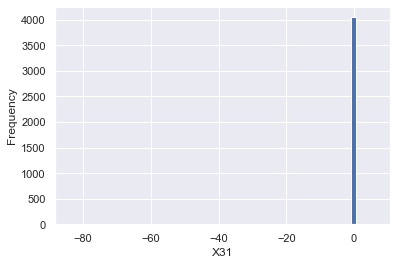

Text(0.5, 0, 'X32')

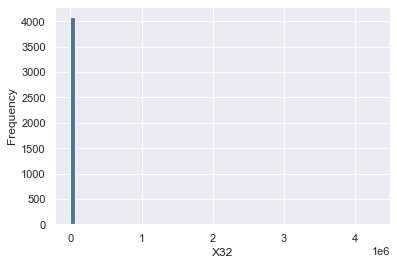

Text(0.5, 0, 'X33')

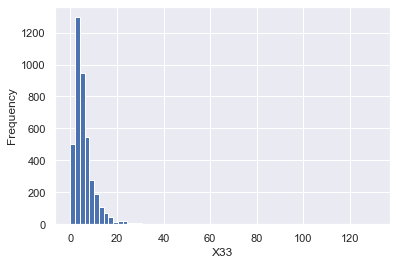

Text(0.5, 0, 'X34')

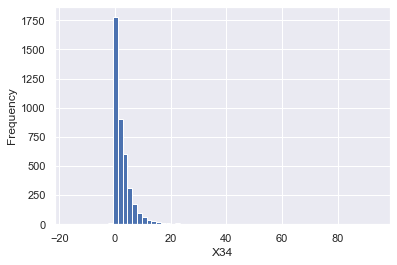

Text(0.5, 0, 'X35')

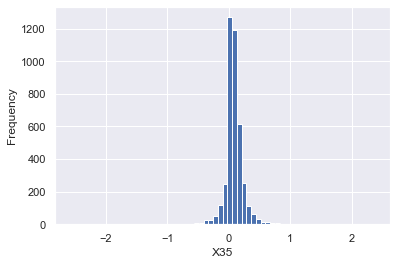

Text(0.5, 0, 'X36')

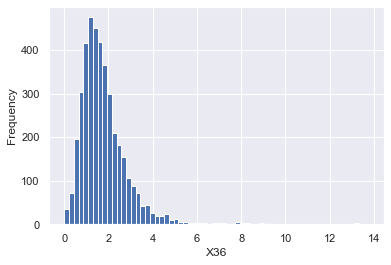

Text(0.5, 0, 'X38')

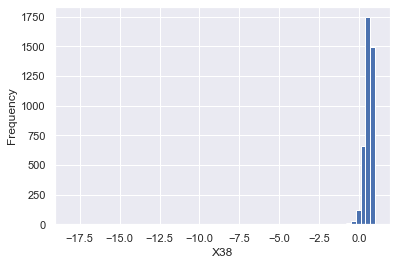

Text(0.5, 0, 'X39')

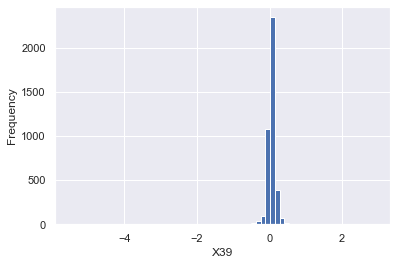

Text(0.5, 0, 'X40')

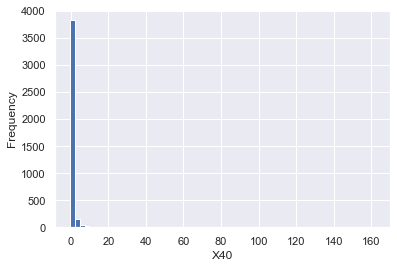

Text(0.5, 0, 'X41')

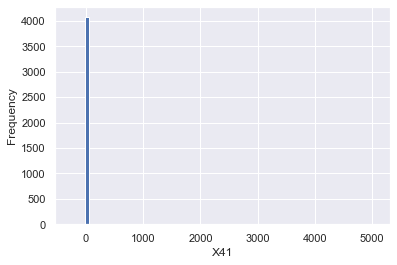

Text(0.5, 0, 'X42')

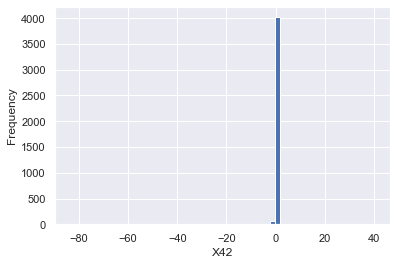

Text(0.5, 0, 'X43')

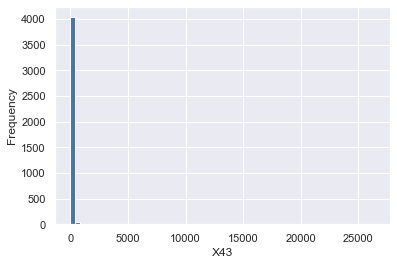

Text(0.5, 0, 'X44')

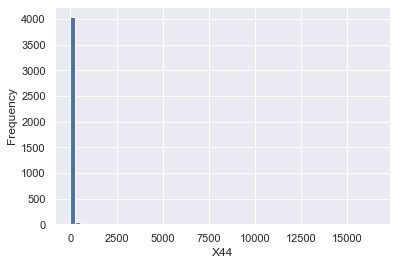

Text(0.5, 0, 'X45')

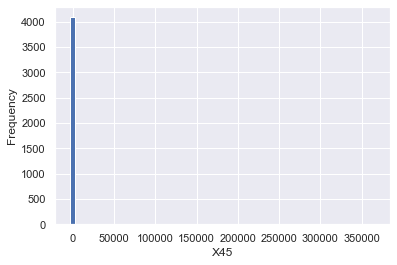

Text(0.5, 0, 'X46')

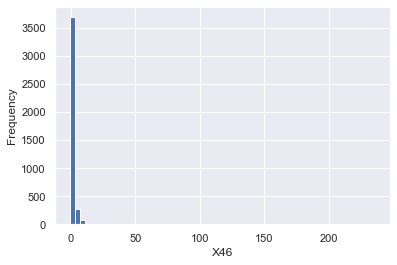

Text(0.5, 0, 'X47')

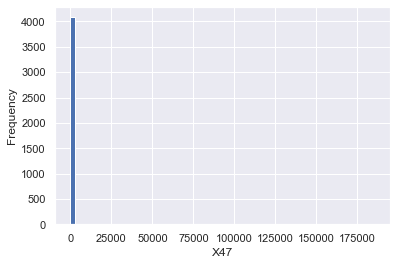

Text(0.5, 0, 'X48')

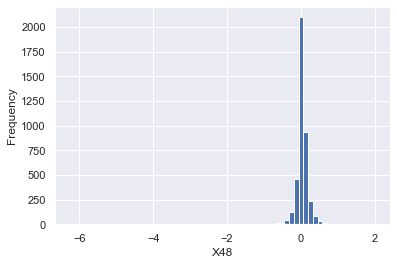

Text(0.5, 0, 'X49')

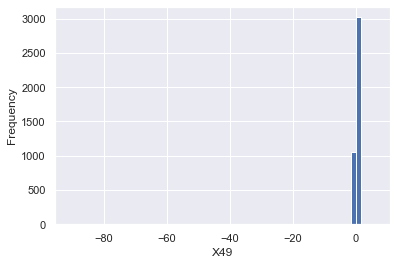

Text(0.5, 0, 'X50')

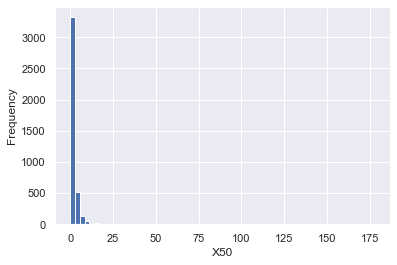

Text(0.5, 0, 'X51')

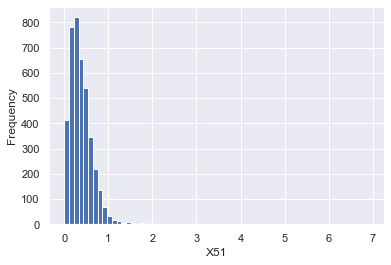

Text(0.5, 0, 'X52')

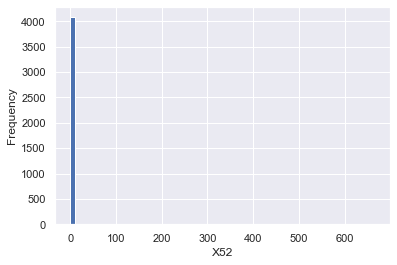

Text(0.5, 0, 'X53')

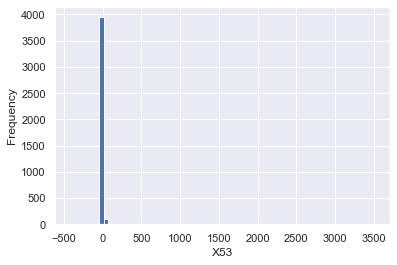

Text(0.5, 0, 'X54')

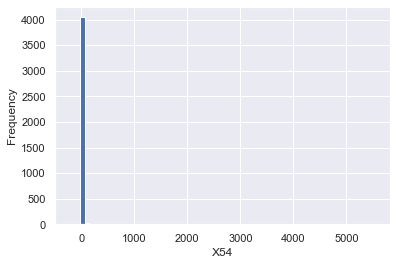

Text(0.5, 0, 'X55')

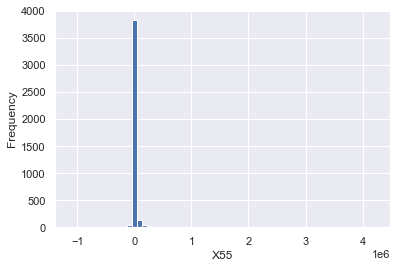

Text(0.5, 0, 'X56')

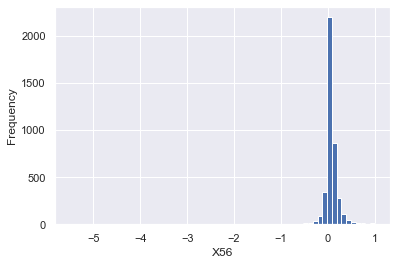

Text(0.5, 0, 'X57')

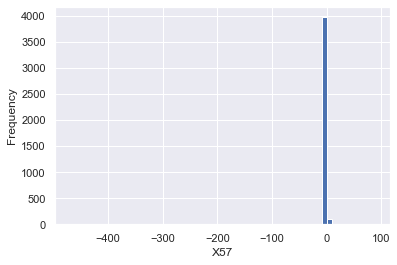

Text(0.5, 0, 'X58')

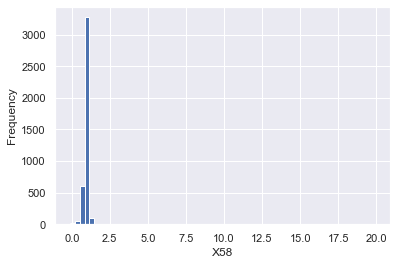

Text(0.5, 0, 'X59')

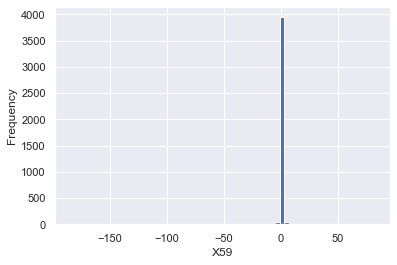

Text(0.5, 0, 'X60')

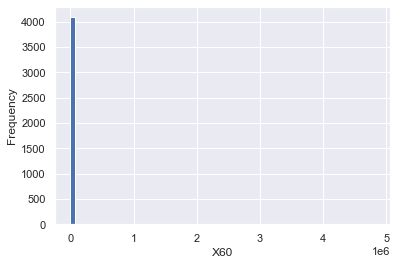

Text(0.5, 0, 'X61')

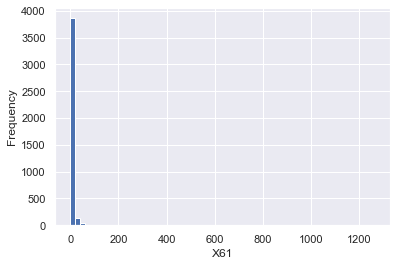

Text(0.5, 0, 'X62')

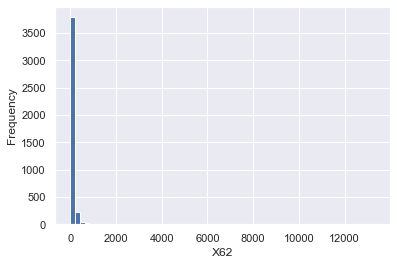

Text(0.5, 0, 'X63')

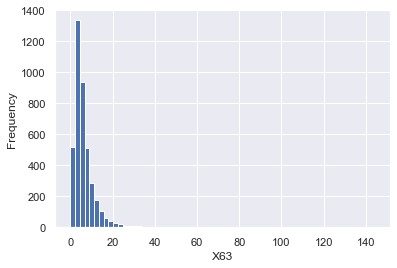

Text(0.5, 0, 'X64')

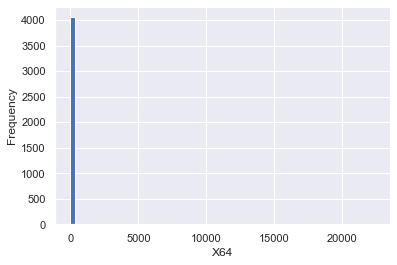

Text(0.5, 0, 'Bankrupt')

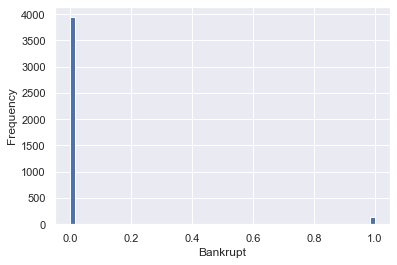

In [399]:
# take a look at all the continuous features' distribution
# bins = sqrt of sample size
bins=int(round(np.sqrt(data_no_missing.drop('Id',axis=1).shape[0]))) #64
for col in data_no_missing.drop('Id',axis=1).columns:
    data_no_missing.drop('Id',axis=1)[col].plot(kind='hist',bins=bins)
    plt.xlabel(col)
    plt.show()

## Data Transformation + Fit Model:

In [47]:
train_corrs = X_train.corr()
# Set the threshold
threshold = 0.87
# Empty dictionary to hold correlated variables
above_threshold_vars = {}
# For each column, record the variables that are above the threshold
for col in train_corrs:
    above_threshold_vars[col] = list(train_corrs.index[train_corrs[col] > threshold])

In [48]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []
# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:next
        else:
        # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

<function next>

Number of columns to remove:  25


In [49]:
cols_to_remove

['X7',
 'X44',
 'X35',
 'X23',
 'X54',
 'X43',
 'X24',
 'X25',
 'X31',
 'X16',
 'X46',
 'X49',
 'X52',
 'X40',
 'X18',
 'X11',
 'X17',
 'X42',
 'X63',
 'X22',
 'X60',
 'X38',
 'X50',
 'X26',
 'X14']

#### Preprocessing using "Standardization & Normalization" to keep features with similar vairnace and approx normal distribution to avoid model fitting bias:
- Normalization transforms the values onto a scale that approximates normality, an assumption that some models make.
- Based on dataset, several features have values below 0, thus I would not choose 'log normalization', but just "standard normalization"

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
preprocess_pipeline = Pipeline(steps=[  ('scaler', scaler) ] )

In [36]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
p_train=preprocess_pipeline.fit_transform(X_train)
pca.fit_transform(p_train)
pca.n_components_

array([[ 1.46381768e+01,  5.96177980e+00, -8.95443264e+00, ...,
         1.57583104e+00, -1.51599721e+00,  3.91102523e-02],
       [-3.52597054e-01, -5.57765879e-01,  7.04640330e-01, ...,
         8.69971186e-03, -1.01661428e-01,  7.59891591e-02],
       [ 7.04617037e+00,  4.14328777e+00, -6.15769655e+00, ...,
        -6.33977426e-01,  1.87893917e-01, -5.12460331e-01],
       ...,
       [ 6.85677239e-01,  2.39071337e-01, -3.91705643e-02, ...,
         5.40087579e-02,  3.52158017e-01,  3.17188015e-01],
       [-1.17600797e-01, -5.32552993e-01,  5.08560089e-01, ...,
        -1.32890110e-01, -4.32366452e-02, -1.83194000e-01],
       [-1.05438738e+00, -2.87260806e-01, -1.20130055e-01, ...,
         4.60487086e-01, -2.87743821e-01,  1.37188574e-01]])

27

Based on PCA(0.95) result, 27 out of 64 features remain for modelling, but for later model fit process, PCA(0.95) is not used in each modeling case. I have tried modeling with PCA(0.95) and without PCA(0.95), and just kept better-performed version in the below sections.

#### Since training set is imbalanced with number of "positive-1" values 27 times than the number of "negative-0" values, "Easy-Ensemble package" would be used for model fitting, combining with regular models

In [53]:
##!pip install -U imbalanced-learn
from imblearn.ensemble import EasyEnsembleClassifier 
from collections import Counter
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt

### Method 1: Logistic regression (linear)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

train_samples = X_train.shape[0]
## logistic_clf = LogisticRegression(C=30 / train_samples,
##                                multi_class='multinomial',
##                                solver='saga',tol=0.01)
logistic_clf=LogisticRegression(solver="liblinear")

            
name = "Logistic Classifier"

scaler = StandardScaler()
preprocess_pipeline = Pipeline(steps=[  ('scaler', scaler) ] )

model_pipeline_LR = Pipeline(steps=[ ("transform", preprocess_pipeline),
                                  ##("pca",PCA(0.95)),# In this case, logistic regression model without PCA(0.95) performs a bit better
                                  ("classify", logistic_clf)
                                    ])

In [72]:
eec1 = EasyEnsembleClassifier(base_estimator=model_pipeline_LR,replacement=False,n_estimators=14)
_=eec1.fit(X_train, y_train) # choose the features for training and test at the same time
y_pred1 = eec1.predict(X_test)

In [73]:
# Cross validation on the combined pipeline
scores = cross_val_score(eec1, X_train, y_train, cv=5)
print("Model: {m:s} avg cross val score={s:3.4f}\n".format(m=name, s=scores.mean()) )

_= eec1.fit(X_train, y_train)

Model: Logistic Classifier avg cross val score=0.8108



#### Evaluate Logistic Regression Classifier Model:

In [76]:
## Evaluate Logistic Regression model based on test set:
from sklearn.metrics import accuracy_score

y_test_pred = eec1.predict(X_test)
score_lr = accuracy_score(y_test, y_test_pred)

print("Test set accuracy score of Logistic Regression Model={s:3.4f}\n".format(s=score_lr))

Test set accuracy score of Logistic Regression Model=0.8160



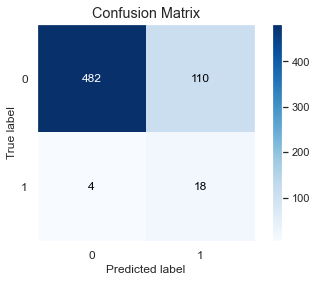

In [74]:
## Evaluate Logistic Regression model based on test set:
skplt.metrics.plot_confusion_matrix(y_test, y_pred1, normalize=False)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       592
           1       0.14      0.82      0.24        22

    accuracy                           0.81       614
   macro avg       0.57      0.82      0.57       614
weighted avg       0.96      0.81      0.87       614



In [77]:
from sklearn.metrics import mean_squared_error
MSE_LR=mean_squared_error(y_test,y_test_pred)
print("Logistic Regression Model Out-of-sample RMSE:", math.sqrt(MSE_LR))

Logistic Regression Model Out-of-sample RMSE: 0.42899777149524065


The logistic regression model works good, but performance of all models would be compared at end of model fittings.

### Method 2: K-nearest neighbours:

In [409]:
## Select n_neighbors with the relatively highest accuracy of test set accuracy score:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    model_p_knn=Pipeline(steps=[("transform",preprocess_pipeline),
                               ("classify_kn",knn)])
    _=model_p_knn.fit(X_train, y_train)
    pred_i = model_p_knn.predict(X_test)
    print("k=",i," ",accuracy_score(y_test, pred_i))

k= 1   0.9511400651465798
k= 2   0.9609120521172638
k= 3   0.9609120521172638
k= 4   0.9625407166123778
k= 5   0.9625407166123778
k= 6   0.9609120521172638
k= 7   0.9609120521172638
k= 8   0.9625407166123778
k= 9   0.9609120521172638
k= 10   0.9641693811074918
k= 11   0.9641693811074918
k= 12   0.9641693811074918
k= 13   0.9641693811074918
k= 14   0.9641693811074918


In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
model_pipeline_knn=Pipeline(steps=[("transform",preprocess_pipeline),
                          ("pca",PCA(0.95)),
                          ("classify_KNN", knn)])

In [79]:
eec2 = EasyEnsembleClassifier(base_estimator=model_pipeline_knn,replacement=False,n_estimators=14)
_=eec2.fit(X_train, y_train) # choose the features for training and test at the same time
y_pred2 = eec2.predict(X_test)

In [80]:
## Cross validation for KNN:
name="KNN Classifier"
scores = cross_val_score(eec2, X_train, y_train, cv=5)
print("Model: {m:s} avg cross val score={s:3.4f}\n".format(m=name, s=scores.mean()) )

Model: KNN Classifier avg cross val score=0.8062



#### Evaluate the K-nearest Neighbour Classifying Model:

In [81]:
from sklearn.metrics import accuracy_score

y_test_pred_knn = eec2.predict(X_test)
score_knn = accuracy_score(y_test, y_test_pred_knn)

print("Test set accuracy score of KNN Classifying Model={s:3.4f}\n".format(s=score_knn))

Test set accuracy score of KNN Classifying Model=0.8225



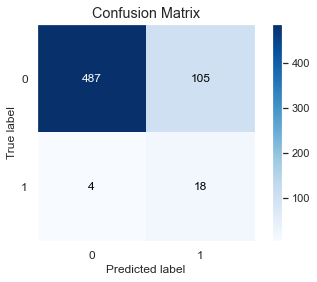

In [83]:
## Evaluate Logistic Regression model based on test set:
skplt.metrics.plot_confusion_matrix(y_test, y_pred2, normalize=False)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       592
           1       0.15      0.82      0.25        22

    accuracy                           0.82       614
   macro avg       0.57      0.82      0.57       614
weighted avg       0.96      0.82      0.88       614



In [82]:
from sklearn.metrics import mean_squared_error
MSE_KNN=mean_squared_error(y_test,y_test_pred_knn)
print("KNN Model Out-of-sample RMSE:", math.sqrt(MSE_KNN))

KNN Model Out-of-sample RMSE: 0.4213364806985347


### Method 3: Lightgbm classifier (This method is suitable for automatically dealling with missing values)

Lightgbm Classification model is a tree-based model. I take use of this model with Easy-Ensemble model to solve problem of having missing feature values in holdout dataset and imbalanced positive and negative examples respectively.
- Lightgbm Classification model is a histogram tree-based model (improvement based on decision tree model), which has faster processing speed than traditional decision tree model and also based on information gain value to do leaf-wise classification. 

In [ ]:
!pip install lightgbm

In [88]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

In [89]:
# Create the tree-based model
model = lgb.LGBMClassifier(n_estimators=1000, objective = 'binary',class_weight = 'balanced', learning_rate = 0.05,reg_alpha = 0.1, reg_lambda = 0.1,subsample = 0.8, n_jobs = -1, random_state = 19)

 # Train the model
eec_light = EasyEnsembleClassifier(base_estimator=model,replacement=False,n_estimators=14)
_=eec_light.fit(X_train, y_train) # choose the features for training and test at the same time
pred_light = eec_light.predict(X_test)

In [90]:
## Cross validation for Lightgbm:
name="Lightgbm Classifier"
scores = cross_val_score(eec_light, X_train, y_train, cv=5)
print("Model: {m:s} avg cross val score={s:3.4f}\n".format(m=name, s=scores.mean()) )

Model: Lightgbm Classifier avg cross val score=0.8301



#### Evaluate the Lightgbm Classifying Model:

In [92]:
from sklearn.metrics import accuracy_score

y_test_pred_lgb = eec_light.predict(X_test)
score_lgb = accuracy_score(y_test, y_test_pred_lgb)

print("Test set accuracy score of Lightgbm Classifying Model={s:3.4f}\n".format(s=score_lgb))

Test set accuracy score of Lightgbm Classifying Model=0.8371



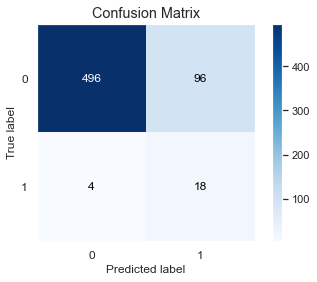

In [93]:
## Evaluate Logistic Regression model based on test set:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_lgb, normalize=False)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_lgb, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       592
           1       0.16      0.82      0.26        22

    accuracy                           0.84       614
   macro avg       0.57      0.83      0.59       614
weighted avg       0.96      0.84      0.89       614



In [95]:
from sklearn.metrics import mean_squared_error
MSE_lightgbm=mean_squared_error(y_test,y_test_pred_lgb)
print("Lightgbm Tree-based Model Out-of-sample RMSE:", math.sqrt(MSE_lightgbm))

Lightgbm Tree-based Model Out-of-sample RMSE: 0.4035671561356308


## Compare Three Models:

In [96]:
# get the probabilities
y_pred_prob1 = eec1.predict_proba(X_test)
y_pred_prob2 = eec2.predict_proba(X_test)
y_pred_prob3 = eec_light.predict_proba(X_test)

In [100]:
# only get bankrupt=1 probabilities
prob1=eec1.predict_proba(X_test)[::,1]
prob2=eec2.predict_proba(X_test)[::,1]
prob3=eec_light.predict_proba(X_test)[::,1]

In [101]:
# ROC
from sklearn.metrics import roc_curve, roc_auc_score

result_table = pd.DataFrame(columns=['fpr','tpr','auc'])
probs=[prob1,prob2,prob3]
for prob in probs:        
    fpr, tpr, _ = roc_curve(y_test,  prob)
    auc = roc_auc_score(y_test, prob)
    
    result_table = result_table.append({'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [103]:
result_table.index=['eec1_LR','eec2_KNN','eec_light_lightgbm']

([<matplotlib.axis.XTick at 0x254da255670>,
 <a list of 11 Text major ticklabel objects>)

Text(0.5, 0, 'Flase Positive Rate')

([<matplotlib.axis.YTick at 0x254da255eb0>,
 <a list of 11 Text major ticklabel objects>)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve Analysis')

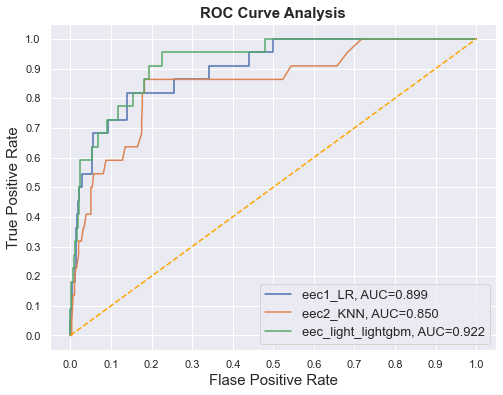

In [104]:
# plot ROC
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

**Comments on comparison:**
- Based on the ROC curve of three models, the third model(lightlgb classifier) with the most left top position should be chosen, which also has the highest AUC value=0.922

# Evaluating your project

We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

In [105]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)


Data shape:  (1092, 65)


In [106]:
for col in holdout_data.columns: 
    holdout_data[col]=pd.to_numeric(data[col], errors='coerce')

In [107]:
for col in holdout_data.columns:
    print(col,holdout_data[col].isnull().sum())

X1 0
X2 0
X3 0
X4 3
X5 4
X6 0
X7 0
X8 3
X9 0
X10 0
X11 0
X12 3
X13 0
X14 0
X15 2
X16 3
X17 3
X18 0
X19 0
X20 0
X21 18
X22 0
X23 0
X24 19
X25 0
X26 3
X27 61
X28 18
X29 0
X30 0
X31 0
X32 17
X33 3
X34 3
X35 0
X36 0
X37 477
X38 0
X39 0
X40 3
X41 12
X42 0
X43 0
X44 0
X45 51
X46 3
X47 12
X48 0
X49 0
X50 3
X51 0
X52 13
X53 18
X54 18
X55 0
X56 0
X57 0
X58 0
X59 0
X60 51
X61 3
X62 0
X63 3
X64 18
Id 0


We will evaluate your model on the holdout examples using metrics
- Accuracy
- Recall
- Precision

From our lecture: we may have to make a trade-off between Recall and Precision.

Our evaluation of your submission will be partially based on how you made (and described) the trade-off.

You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

# Your model

Time for you to continue the Recipe for Machine Learning on your own.



## Submission guidelines

Although your notebook may contain many models (e.g., due to your iterative development)
we will only evaluate a single model.
So choose one (explain why !) and do the following.

- You will implement the body of a subroutine `MyModel`
    - That takes as argument a Pandas DataFrame 
        - Each row is an example on which to predict
        - The features of the example are elements of the row
    - Performs predictions on each example
    - Returns an array or predictions with a one-to-one correspondence with the examples in the test set
    

We will evaluate your model against the holdout data
- By reading the holdout examples `X_hold` (as above)
- Calling `y_hold_pred = MyModel(X_hold)` to get the predictions
- Comparing the predicted values `y_hold_pred` against the true labels `y_hold` which are known only to the instructors

See the following cell as an illustration

**Remember**

The holdout data is in the same format as the one we used for training
- Except that it has no attribute for the target
- So you will need to perform all the transformations on the holdout data
    - As you did on the training data
    - Including turning the string representation of numbers into actual numeric data types

All of this work *must* be performed within the body of the `MyModel` routine you will write

We will grade you by comparing the predictions array you create to the answers known to us.

In [317]:
np.where(holdout_data["X5"].isnull()==True)

(array([ 21,  37, 240, 757], dtype=int64),)

In [318]:
holdout_data["X5"][21]

nan

In [111]:
import pandas as pd
import os

def MyModel(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    ## Transform string representation to numeric data types:
    for col in X.columns: 
        X[col]=pd.to_numeric(X[col], errors='coerce')
    ## Drop Missing data 
    ## Since the x37 miss too many data points, thus the x37 feature is not going to be used in prediction for all examples. "Id" does not help in predicting bankruptcy, thus being dropped
    X_without_X37=pd.DataFrame(X.drop(columns=["X37","Id"])) # 63 columns left now
    ## Create the model
    model = lgb.LGBMClassifier(n_estimators=1000, objective = 'binary',class_weight = 'balanced', learning_rate = 0.05,reg_alpha = 0.1, reg_lambda = 0.1,subsample = 0.8, n_jobs = -1, random_state = 19)

    ## Train the model
    eec_light = EasyEnsembleClassifier(base_estimator=model,replacement=False,n_estimators=14)
    _=eec_light.fit(X_train, y_train) # choose the features for training and test at the same time
    pred_light = eec_light.predict(X_without_X37)
    predictions=pred_light
    
    return predictions



# Check your work: predict and evaluate metrics on *your* test examples

Although only the instructors have the correct labels for the holdout dataset, you may want
to create your own test dataset on which to evaluate your out of sample metrics.

If you choose to do so, you can evaluate your models using the same metrics that the instructors will use.

- Test whether your implementation of `MyModel` works
- See the metrics  your model produces

In [108]:
X_test=data.drop(columns=["Bankrupt"]).iloc[1:1093,:]

In [109]:

y_test=data["Bankrupt"].iloc[1:1093]
from sklearn.metrics import recall_score,precision_score

In [112]:
name = "Choose a descriptive name for your model"
y_test_pred = MyModel(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test, y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

	Choose a descriptive name for your model Accuracy: 84.4%, Recall 84.7%, Precision 27.7%


In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1020
           1       0.28      0.85      0.42        72

    accuracy                           0.84      1092
   macro avg       0.63      0.85      0.66      1092
weighted avg       0.94      0.84      0.88      1092



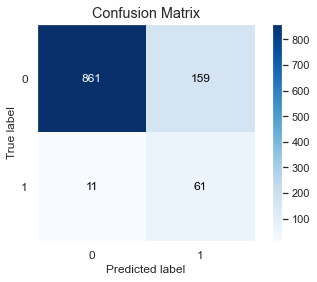

In [115]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=False)

### Conclusion:
- This result is based on my own test set, not on the holdout_data, please use holdout_data and related code to test this lightlgb model's performance.
- My thoughts on trade-off of precision, and recall rates:
    - Accuracy rate shows all correctly predicted number of values divided by all example numbers.(TP+TN)/(TP+TN+FP+FN): Using model lightlgb, accuracy rate is 84%, which is not bad.
    - Precision rate of positive-1 shows TP/(TP+FP), shows number of correctly predicted positive-1 divided by number of all positive predictions;the precision rate is very low. This is to some extent due to so small volume of positive-1 examples and very large volume of negative-0 examples in the imbalanced dataset.Thus, just focusing on getting a high precision rate in this specific question does not make much sense.
    - Recall rate of positive-1 shows TP/(TP+FN), shows number of correctly predicted positive-1 divided by number of truly positive-1. **Recal rate of positive-1 is the most important indicator in this case**. Since our research and analysis result determines whether lending money or not to a company, if a company truly would go bankrupt, but is not predicted correctly would cause great financial loss to lender (us). Thus, to correctly detect as many 'truly would go bankrupt' company as possible is the key goal in this specific case.

**Further improvement thinking:**
- If I have any chance to improve this prediction model, I would remove several features with high correlation above 0.85 (the method would be just leaving one feature, if some of them are highly correlated)to better avoid the problem of over-fitting (related code as running cell 47-48).

#### This is the end of my midterm homework, thank you for reading and grading.